### Case 2 - Computational Data Analysis

#### UTKFaces dataset

We use the clean version of the data (cropped and aligned) as given in the provided 'data.zip' file. 

- Faces: contains 23705 aligned and cropped images of shape (200 x 200 x 3) i.e. (Height x Width x Channel).
- labels.csv: labels of the images in the same order as the images in the 'Faces' folder; given in comma separated format as: age, gender, race.
- filenames.txt: original filenames of the images in the same order as the images and the labels.


In [1]:
# Load the data: 

# Load all of the images in an HxWxC array
import os
import numpy as np
import skimage
import pandas as pd
import matplotlib.image as mpimg
from skimage.io import imread,imshow
import matplotlib.pyplot as plt
from skimage.color import rgb2gray 

images = np.zeros((5000, 200, 200, 3), dtype=np.uint8)
images_gray = np.zeros((5000, 200, 200))

i=0
for image in range(5000):
    filename = str(image)+'.jpg'
    images[i,:,:,:] = mpimg.imread('/Users/s210289/CASE 2/Faces/'+filename)
    images_gray[i,:,:] = rgb2gray(images[i])
    i = i + 1

labels = pd.read_csv('labels.csv',names=['age','gender','race'])


When performing PCA on images, we need to construct a 'flat' vactor of features, where the intensity of every pixel of an image is a feature (i.e. each image is represented as a vector instead of as a matrix). There should be no problem on using a RGB image in PCA by creating a vector of 200x200x3 features for each image, but for now, we decided to work in grayscale to reduce the dimensions of the problem and reduce MemoryErrors. 

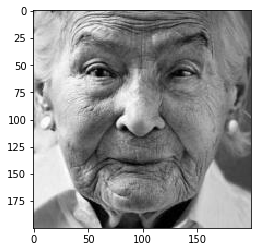

In [2]:
plt.imshow(images_gray[9],cmap = "gray")

### PCA

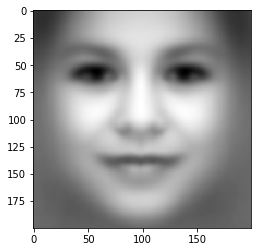

In [3]:
img_mean = np.mean(images_gray, axis = 0)
plt.imshow(img_mean, cmap = "gray")

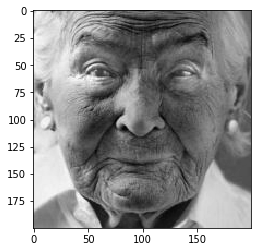

In [4]:
images_gray = images_gray - img_mean
plt.imshow(images_gray[9], cmap = 'gray')

In [5]:
images_gray.shape

(5000, 200, 200)

In [6]:
height = images_gray.shape[1]
width = images_gray.shape[2]

images = np.reshape(images_gray, (images_gray.shape[0], height * width))
images.shape

(5000, 40000)

In [8]:
from sklearn.decomposition import PCA
n_features = min(5000, height*width)  #n_components=40000 must be between 0 and min(n_samples, n_features)=5000 with svd_solver='full'
n_components = n_features
pca = PCA(n_components=n_components)
S = pca.fit_transform(images)
A = pca.components_

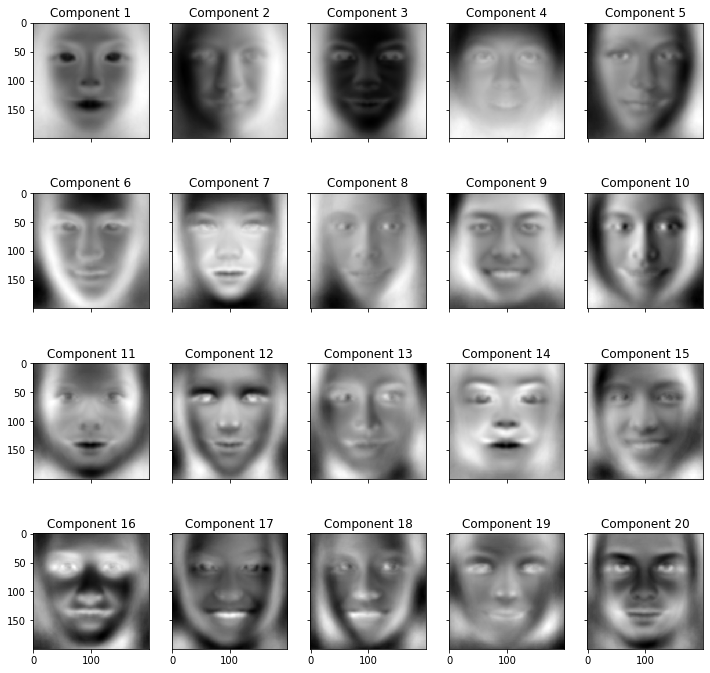

In [9]:
# Visually inspect the first few PCA components as images - by adding/subtracting each scaled PC to the mean:

A = pca.components_
#img_plot = S @ A
img_plot = np.reshape(A, (n_components, height, width))

f, axs = plt.subplots(4, 5, figsize=(12, 12), sharex=True, sharey=True)
axs = axs.flatten()
for i, ax in zip(range(20), axs):
    ax.imshow(img_plot[i,:,:], cmap ='gray')
    ax.set_title('Component ' + str(i+1))
plt.show()

### Select a subset of relevant PCs:

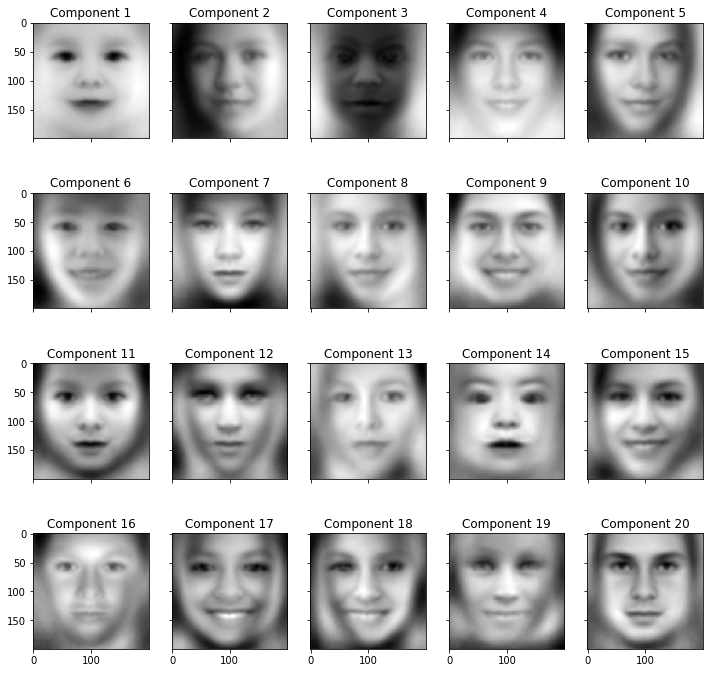

In [10]:
S_max = np.max(S,axis=0)
components = (S_max * A.T).T
f, axs = plt.subplots(4, 5, figsize=(12, 12), sharex=True, sharey=True)
axs = axs.flatten()
for i, ax in zip(range(20), axs):
    img = np.reshape(components[i],(1, height,width))
    ax.imshow(img_mean + img[0,:,:], cmap ='gray')
    ax.set_title('Component ' + str(i+1))
plt.show()

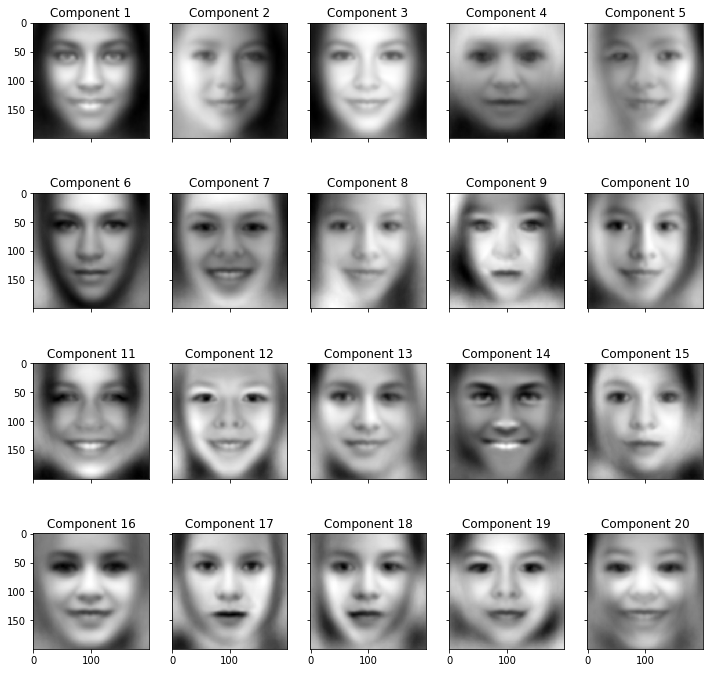

In [11]:
S_min = np.min(S,axis=0)

components = (S_min * A.T).T
f, axs = plt.subplots(4, 5, figsize=(12, 12), sharex=True, sharey=True)
axs = axs.flatten()
for i, ax in zip(range(20), axs):
    img = np.reshape(components[i],(1, height,width))
    ax.imshow(img_mean + img[0,:,:], cmap ='gray')
    ax.set_title('Component ' + str(i+1))
plt.show()

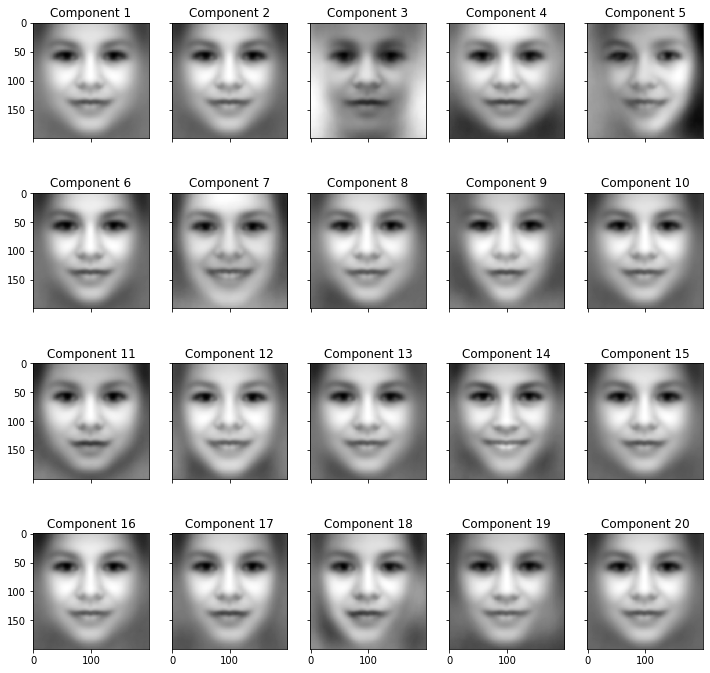

In [12]:
components = (S[0,:] * A.T).T
f, axs = plt.subplots(4, 5, figsize=(12, 12), sharex=True, sharey=True)
axs = axs.flatten()
for i, ax in zip(range(20), axs):
    img = np.reshape(components[i],(1, height,width))
    ax.imshow(img_mean + img[0,:,:], cmap ='gray')
    ax.set_title('Component ' + str(i+1))
plt.show()

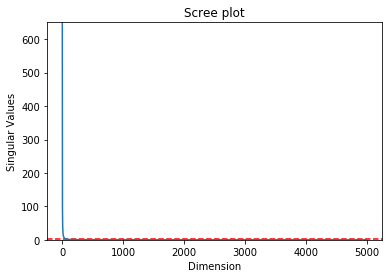

In [14]:
plt.ylabel('Singular Values')
plt.xlabel('Dimension')
plt.title('Scree plot')
plt.ylim(0, max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(pca.explained_variance_)
plt.show()

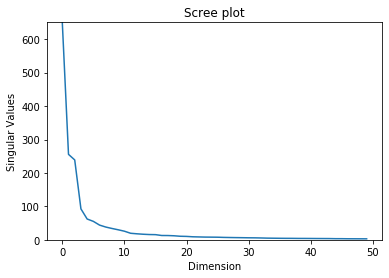

In [17]:
n_features = min(5000, height*width)  #n_components=40000 must be between 0 and min(n_samples, n_features)=5000 with svd_solver='full'
n_components = 50
pca = PCA(n_components=n_components)
S = pca.fit_transform(images)
A = pca.components_

plt.ylabel('Singular Values')
plt.xlabel('Dimension')
plt.title('Scree plot')
plt.ylim(0, max(pca.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.plot(pca.explained_variance_)
plt.show()

In [ ]:
# We would also need the Randomized trace to compare eigenvalues to those obtained from 
# randomized data. But I am a bit confused about this. 